Importing all the modules. Some may not be needed as of now. 

In [262]:
# modules - probably too many
import numpy as np
import pandas as pd
import pickle
import matplotlib
import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn import neighbors
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import matplotlib.colors as colors
from scipy import stats
pd.options.mode.chained_assignment = None  # default='warn'
import math
import seaborn as sns
import multiprocessing
import numpy.matlib as npm
import geeadd
import ee
#import mlLocal
from importlib import reload

Reading in all calibration data.

In [263]:
dfALL = pd.read_pickle('G:/cassidy/MODISLANDSAT/MODISLANDSATall.pkl')
dfALLtrim = pd.read_pickle('G:/cassidy/MODISLANDSAT/MODISLANDSATalltrim.pkl')
dfALLtrimKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/MODISLANDSATalltrimKANG.pkl')

Maps of Sample for each dataset

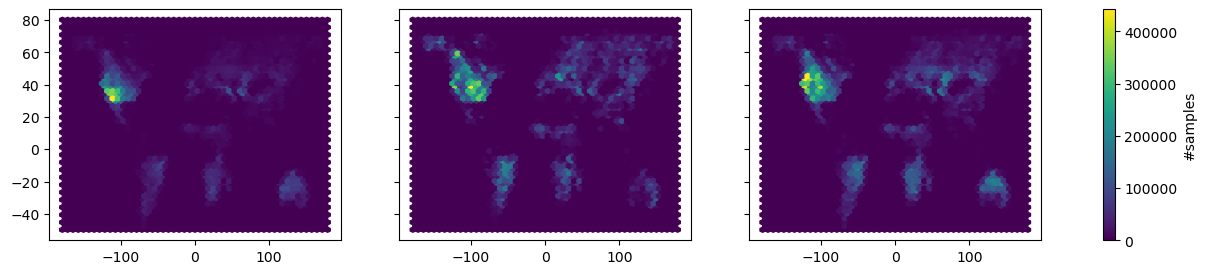

In [264]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(16,3), sharex=True, sharey=True)
cmap=cm.get_cmap('viridis')
hb = ax[0].hexbin(dfALL['Lon'],dfALL['Lat'], gridsize=(50),cmap=cmap)
hb = ax[1].hexbin(dfALLtrim['Lon'],dfALLtrim['Lat'], gridsize=(50),cmap=cmap)
hb = ax[2].hexbin(dfALLtrimKANG['Lon'], dfALLtrimKANG['Lat'], gridsize=(50),cmap=cmap)
# ax.set_title("Calibration Samples")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('#samples')
#plt.savefig('Figure1.png', bbox_inches='tight')
plt.show()

In [265]:
# Validation data for LAI and FAPAR
valbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictLAI.pkl')
valbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictFAPAR.pkl')

# Calibration data for LAI and FAPAR
calbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAI.pkl')
calbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPAR.pkl')

# Kang's calibration data for LAI and FAPAR
calbiomeDictLAIKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAIKANG.pkl')
calbiomeDictFAPARKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPARKANG.pkl')

# https://drive.google.com/drive/folders/1jVKwxWPlH7nYnpL1yJAUD2jFkXV3A1kf?usp=share_link

Maps of Sample for each LC_Type

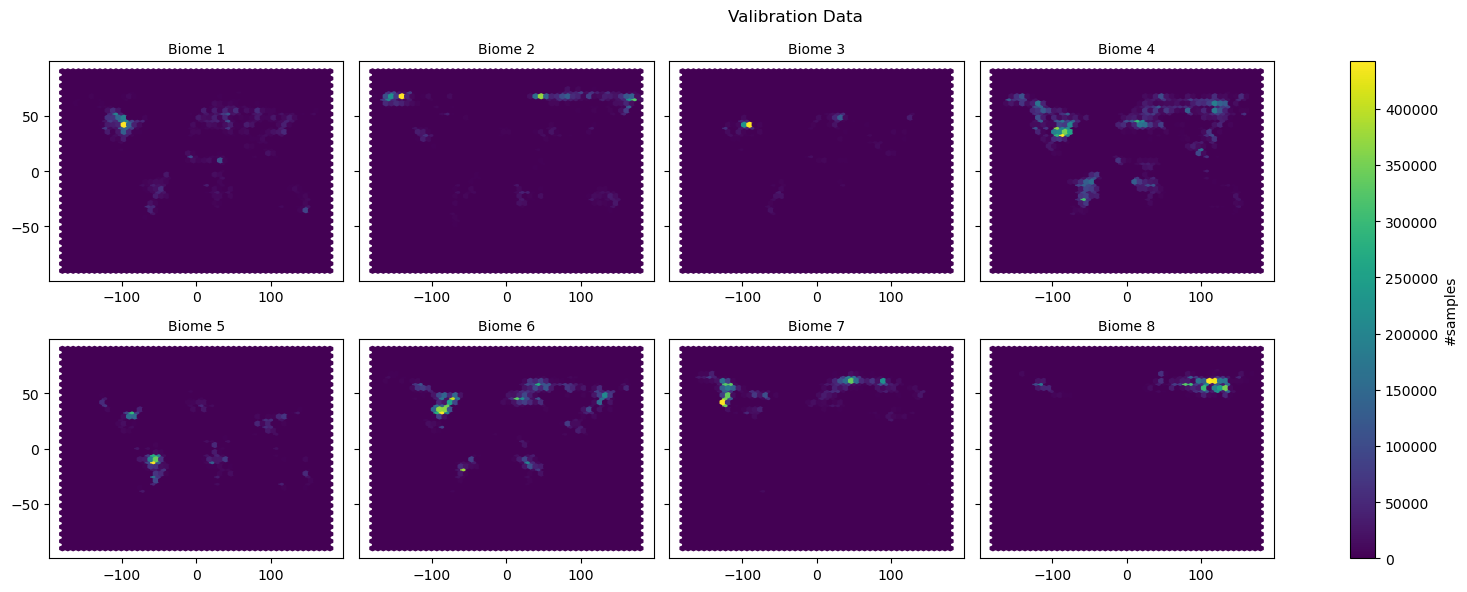

In [266]:
fig, axes = plt.subplots(2, 4, figsize=(16,6), sharey=True)
cmap=cm.get_cmap('viridis')
im=cm.ScalarMappable()
axes[0][0].hexbin(valbiomeDictLAI[1]['DF']['Lon'], valbiomeDictLAI[1]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][1].hexbin(valbiomeDictLAI[2]['DF']['Lon'], valbiomeDictLAI[2]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][2].hexbin(valbiomeDictLAI[3]['DF']['Lon'], valbiomeDictLAI[3]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][3].hexbin(valbiomeDictLAI[4]['DF']['Lon'], valbiomeDictLAI[4]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

axes[1][0].hexbin(valbiomeDictLAI[5]['DF']['Lon'], valbiomeDictLAI[5]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][1].hexbin(valbiomeDictLAI[6]['DF']['Lon'], valbiomeDictLAI[6]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][2].hexbin(valbiomeDictLAI[7]['DF']['Lon'], valbiomeDictLAI[7]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][3].hexbin(valbiomeDictLAI[8]['DF']['Lon'], valbiomeDictLAI[8]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

fig.suptitle('Valibration Data')

# Title biomes
axes[0][0].set_title('Biome 1', size=10)
axes[0][1].set_title('Biome 2', size=10)
axes[0][2].set_title('Biome 3', size=10)
axes[0][3].set_title('Biome 4', size=10)

axes[1][0].set_title('Biome 5', size=10)
axes[1][1].set_title('Biome 6', size=10)
axes[1][2].set_title('Biome 7', size=10)
axes[1][3].set_title('Biome 8', size=10)

fig.tight_layout()

#Add colorbar
cb = fig.colorbar(hb, ax=axes)
cb.set_label('#samples')

plt.show()

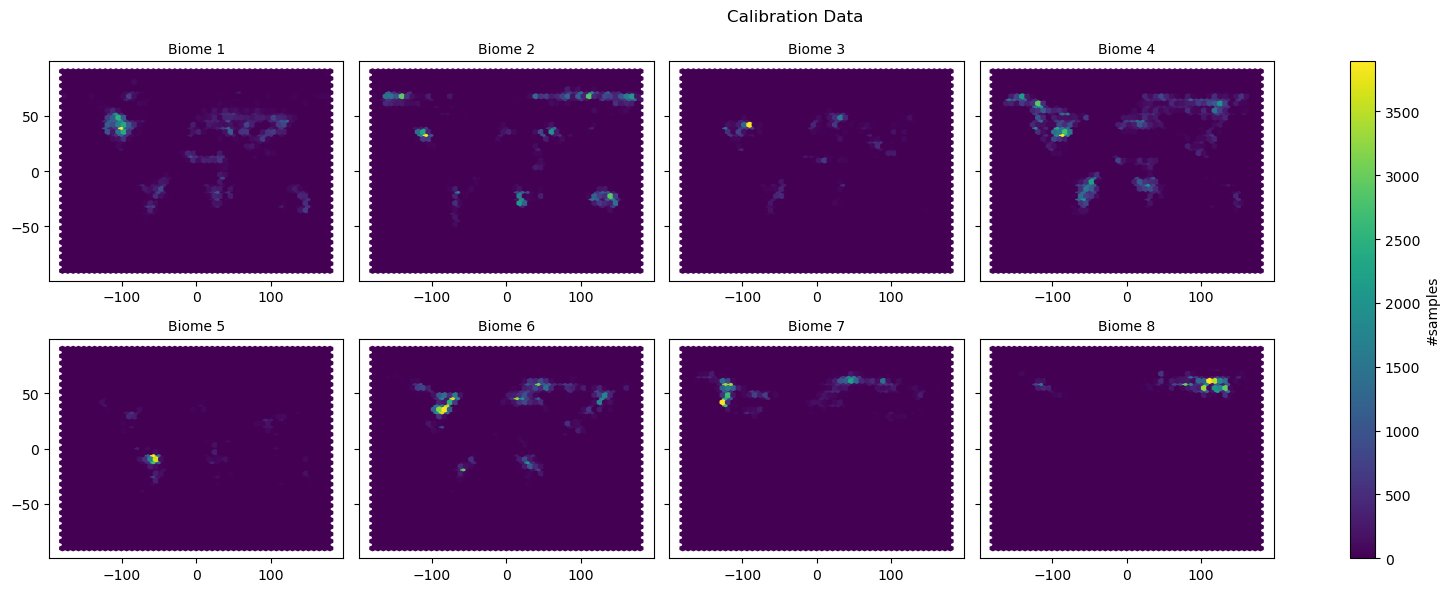

In [267]:
fig, axes = plt.subplots(2, 4, figsize=(16,6), sharey=True)
cmap=cm.get_cmap('viridis')
im=cm.ScalarMappable()
axes[0][0].hexbin(calbiomeDictLAI[1]['DF']['Lon'], calbiomeDictLAI[1]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][1].hexbin(calbiomeDictLAI[2]['DF']['Lon'], calbiomeDictLAI[2]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][2].hexbin(calbiomeDictLAI[3]['DF']['Lon'], calbiomeDictLAI[3]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][3].hexbin(calbiomeDictLAI[4]['DF']['Lon'], calbiomeDictLAI[4]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

axes[1][0].hexbin(calbiomeDictLAI[5]['DF']['Lon'], calbiomeDictLAI[5]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][1].hexbin(calbiomeDictLAI[6]['DF']['Lon'], calbiomeDictLAI[6]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][2].hexbin(calbiomeDictLAI[7]['DF']['Lon'], calbiomeDictLAI[7]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
hb = axes[1][3].hexbin(calbiomeDictLAI[8]['DF']['Lon'], calbiomeDictLAI[8]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

fig.suptitle('Calibration Data')

# Title biomes
axes[0][0].set_title('Biome 1', size=10)
axes[0][1].set_title('Biome 2', size=10)
axes[0][2].set_title('Biome 3', size=10)
axes[0][3].set_title('Biome 4', size=10)

axes[1][0].set_title('Biome 5', size=10)
axes[1][1].set_title('Biome 6', size=10)
axes[1][2].set_title('Biome 7', size=10)
axes[1][3].set_title('Biome 8', size=10)

fig.tight_layout()

#Add colorbar
cb = fig.colorbar(hb, ax=axes)
cb.set_label('#samples')

plt.show()

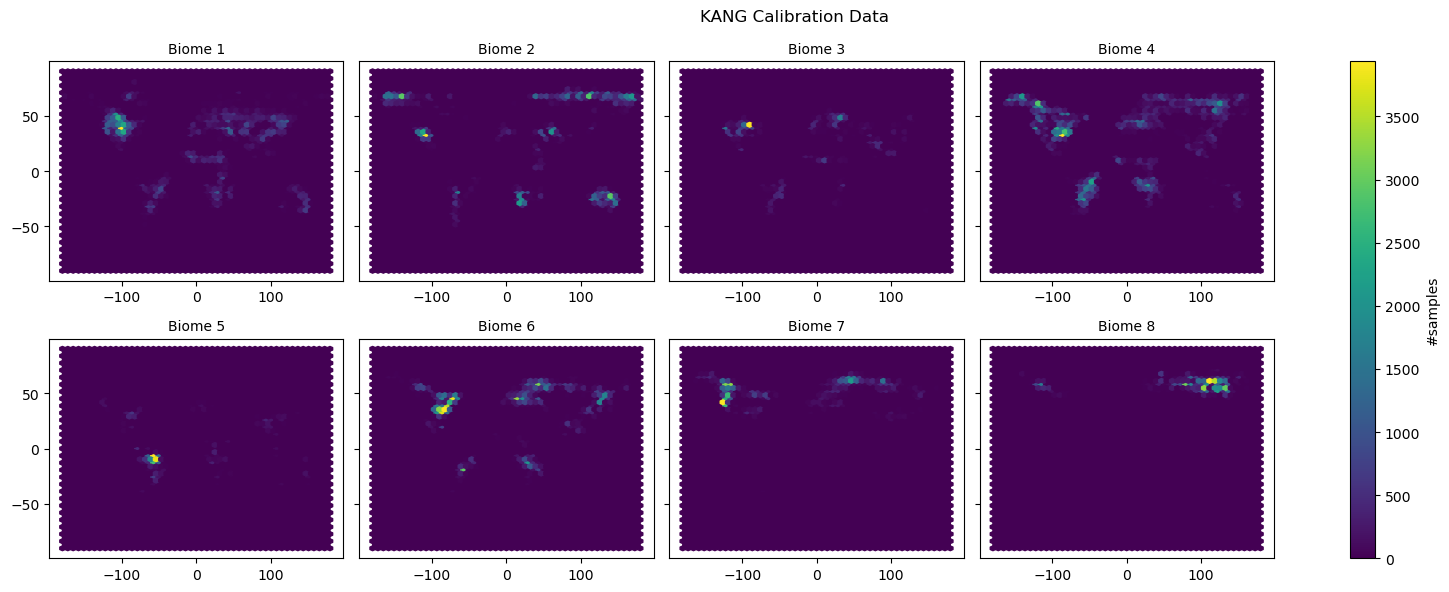

In [268]:
fig, axes = plt.subplots(2, 4, figsize=(16,6), sharey=True)
cmap=cm.get_cmap('viridis')
im=cm.ScalarMappable()
axes[0][0].hexbin(calbiomeDictLAIKANG[1]['DF']['Lon'], calbiomeDictLAIKANG[1]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][1].hexbin(calbiomeDictLAIKANG[2]['DF']['Lon'], calbiomeDictLAIKANG[2]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][2].hexbin(calbiomeDictLAIKANG[3]['DF']['Lon'], calbiomeDictLAIKANG[3]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[0][3].hexbin(calbiomeDictLAIKANG[4]['DF']['Lon'], calbiomeDictLAIKANG[4]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

axes[1][0].hexbin(calbiomeDictLAIKANG[5]['DF']['Lon'], calbiomeDictLAIKANG[5]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][1].hexbin(calbiomeDictLAIKANG[6]['DF']['Lon'], calbiomeDictLAIKANG[6]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
axes[1][2].hexbin(calbiomeDictLAIKANG[7]['DF']['Lon'], calbiomeDictLAIKANG[7]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))
hb = axes[1][3].hexbin(calbiomeDictLAIKANG[8]['DF']['Lon'], calbiomeDictLAIKANG[8]['DF']['Lat'], gridsize=(50),cmap=cmap, extent=(-180,180,-90,90))

fig.suptitle('KANG Calibration Data')

# Title biomes
axes[0][0].set_title('Biome 1', size=10)
axes[0][1].set_title('Biome 2', size=10)
axes[0][2].set_title('Biome 3', size=10)
axes[0][3].set_title('Biome 4', size=10)

axes[1][0].set_title('Biome 5', size=10)
axes[1][1].set_title('Biome 6', size=10)
axes[1][2].set_title('Biome 7', size=10)
axes[1][3].set_title('Biome 8', size=10)

fig.tight_layout()

#Add colorbar
cb = fig.colorbar(hb, ax=axes)
cb.set_label('#samples')

plt.show()

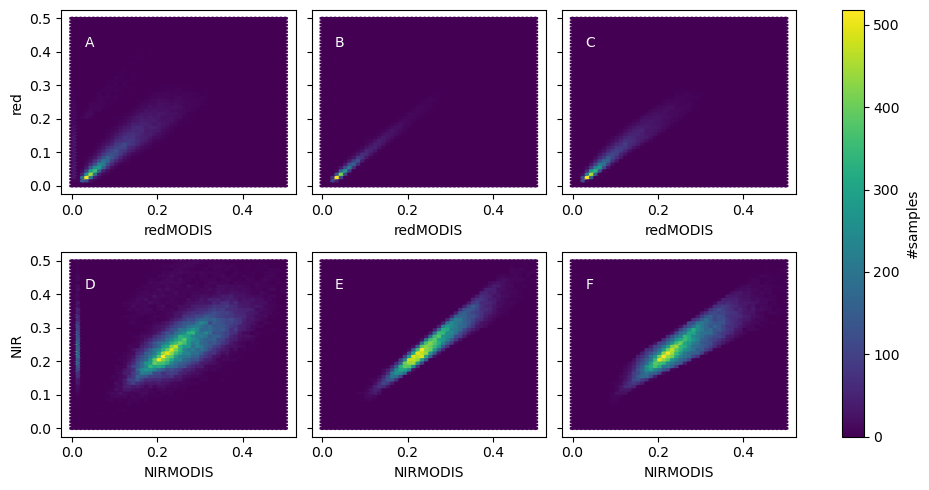

In [269]:
fig, axs = plt.subplots(nrows=2,ncols=3,sharey=True,figsize=(10,5))
dfA = dfALL.sample(100000) / 10000
axs[0,0].hexbin(dfA['redMODIS'],dfA['red'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[0,0].set(xlabel='redMODIS', ylabel='red')
axs[1,0].hexbin(dfA['NIRMODIS'],dfA['NIR'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[1,0].set(xlabel='NIRMODIS', ylabel='NIR')

dfT = dfALLtrim.sample(100000) / 10000
axs[0,1].hexbin(dfT['redMODIS'],dfT['red'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[0,1].set(xlabel='redMODIS')
hb=axs[1,1].hexbin(dfT['NIRMODIS'],dfT['NIR'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[1,1].set(xlabel='NIRMODIS')

dfK = dfALLtrimKANG.sample(100000) / 10000
axs[0,2].hexbin(dfK['redMODIS'],dfK['red'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[0,2].set(xlabel='redMODIS')
hb=axs[1,2].hexbin(dfK['NIRMODIS'],dfK['NIR'], gridsize=(50,50), extent=(0,0.5,0,0.5))
axs[1,2].set(xlabel='NIRMODIS')

#Add colorbar
fig.tight_layout()
cb = fig.colorbar(hb, ax=axs)
cb.set_label('#samples')

#Add labels
axs[0,0].text(0.1, 0.8, 'A', size=10, color='white', transform=axs[0,0].transAxes)
axs[1,0].text(0.1, 0.8, 'D', size=10, color='white', transform=axs[1,0].transAxes)
axs[0,1].text(0.1, 0.8, 'B', size=10, color='white', transform=axs[0,1].transAxes)
axs[1,1].text(0.1, 0.8, 'E', size=10, color='white', transform=axs[1,1].transAxes)
axs[0,2].text(0.1, 0.8, 'C', size=10, color='white', transform=axs[0,2].transAxes)
axs[1,2].text(0.1, 0.8, 'F', size=10, color='white', transform=axs[1,2].transAxes)

plt.show()

Pairplots of sampled respose values by biome

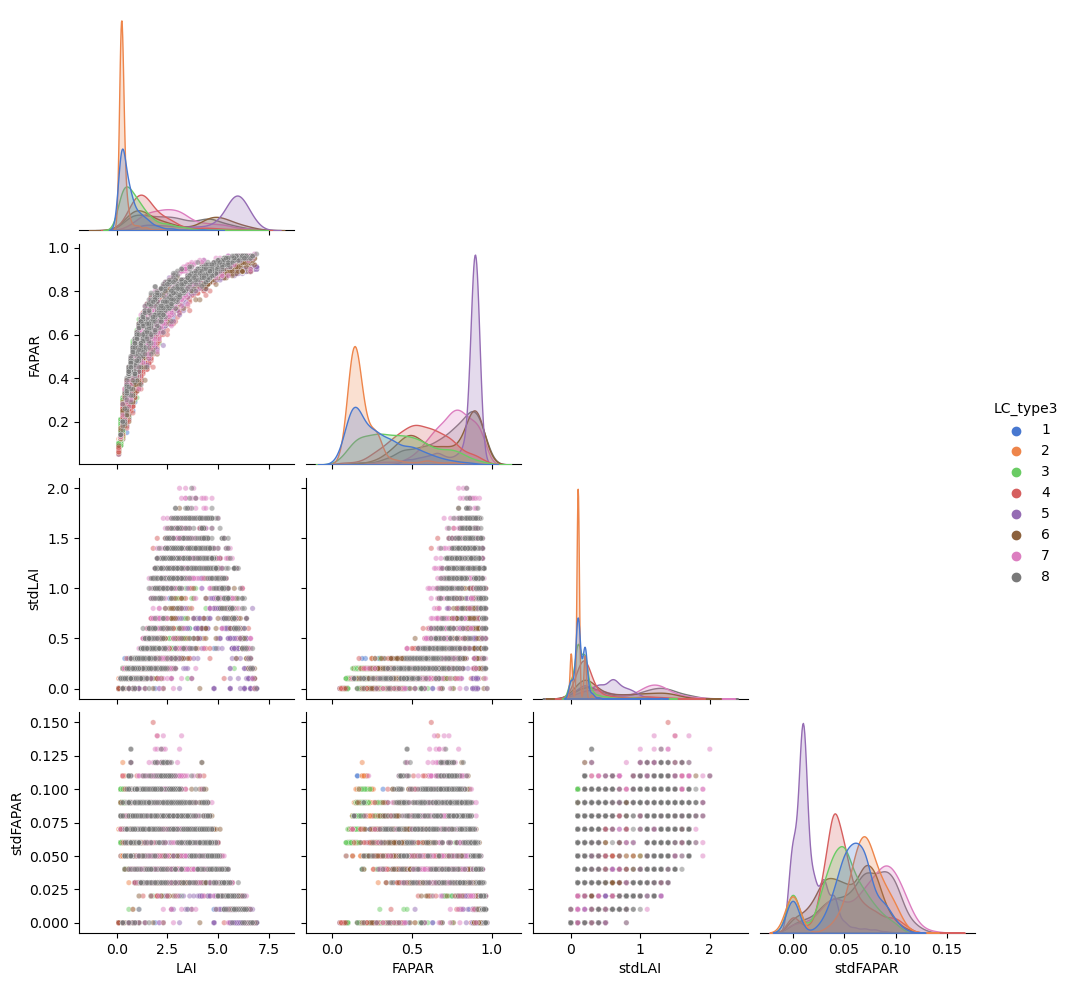

In [270]:
dfScaling = pd.DataFrame([[10., 100.,10.,100.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3'])
dfPlot = dfALL.loc[dfALL['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3']].groupby('LC_type3').sample(1000).div(dfScaling.iloc[0])
dfPlot['LC_type3'] = dfPlot['LC_type3'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LC_type3',palette='muted',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure2.png", bbox_inches='tight') 

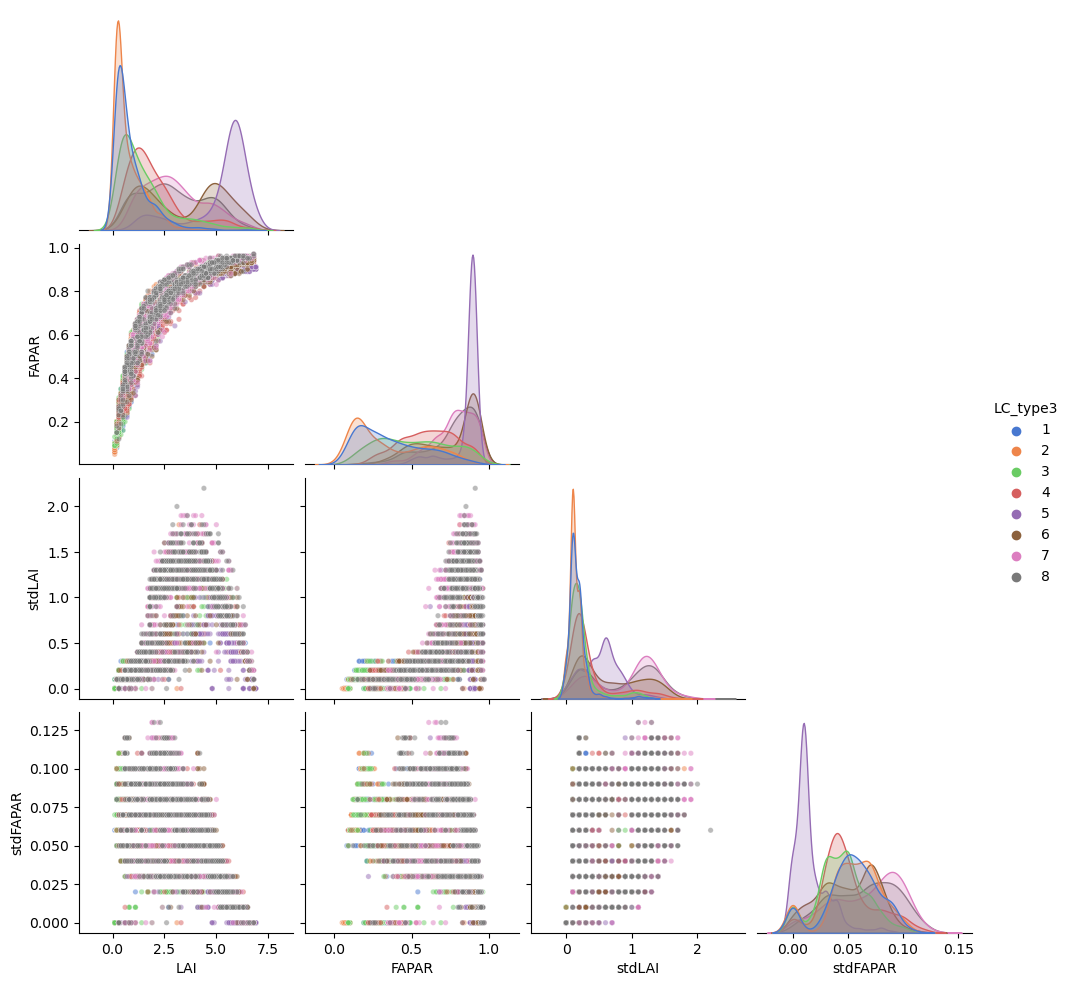

In [271]:
dfScaling = pd.DataFrame([[10., 100.,10.,100.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3'])
dfPlot = dfALLtrim.loc[dfALLtrim['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3']].groupby('LC_type3').sample(1000).div(dfScaling.iloc[0])
dfPlot['LC_type3'] = dfPlot['LC_type3'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LC_type3',palette='muted',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure2.png", bbox_inches='tight') 

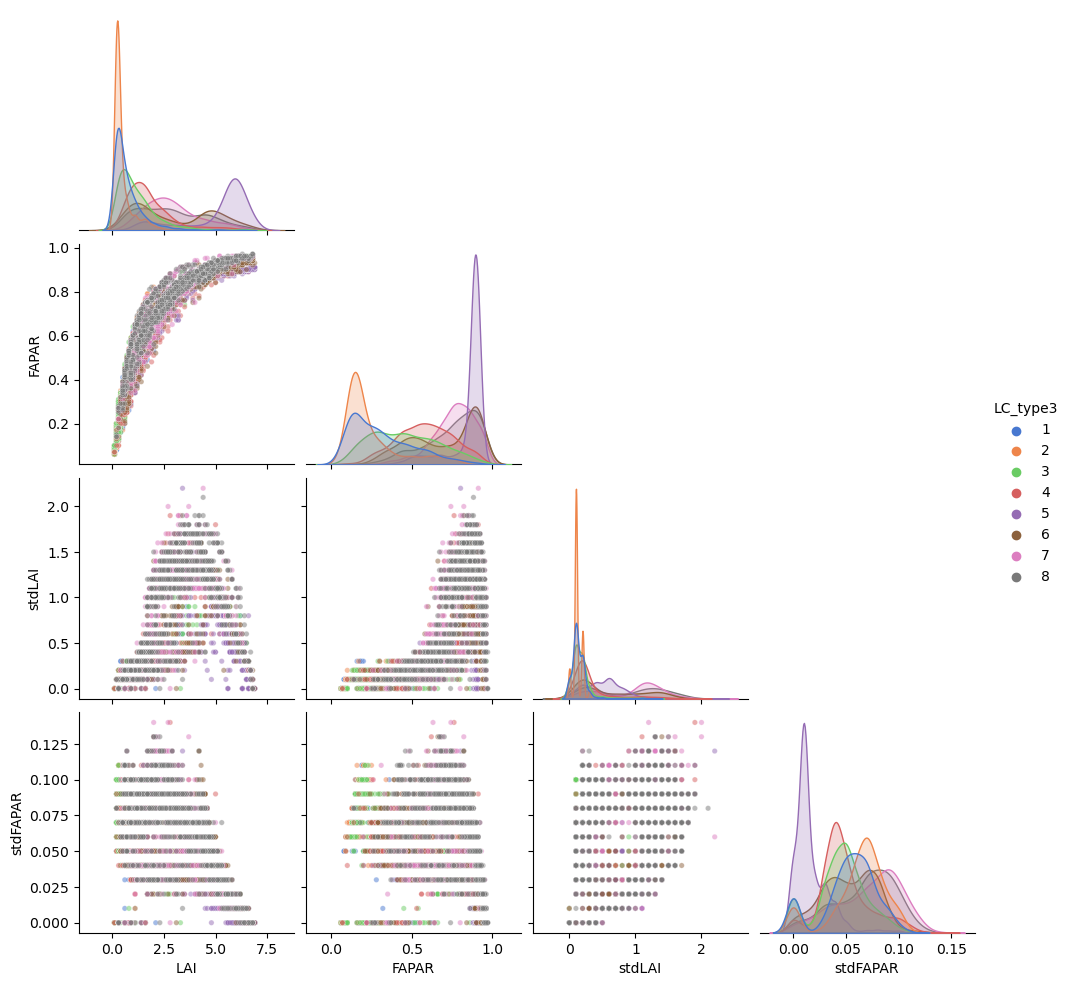

In [272]:
dfScaling = pd.DataFrame([[10., 100.,10.,100.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3'])
dfPlot = dfALLtrimKANG.loc[dfALLtrimKANG['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LC_type3']].groupby('LC_type3').sample(1000).div(dfScaling.iloc[0])
dfPlot['LC_type3'] = dfPlot['LC_type3'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LC_type3',palette='muted',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure2.png", bbox_inches='tight') 

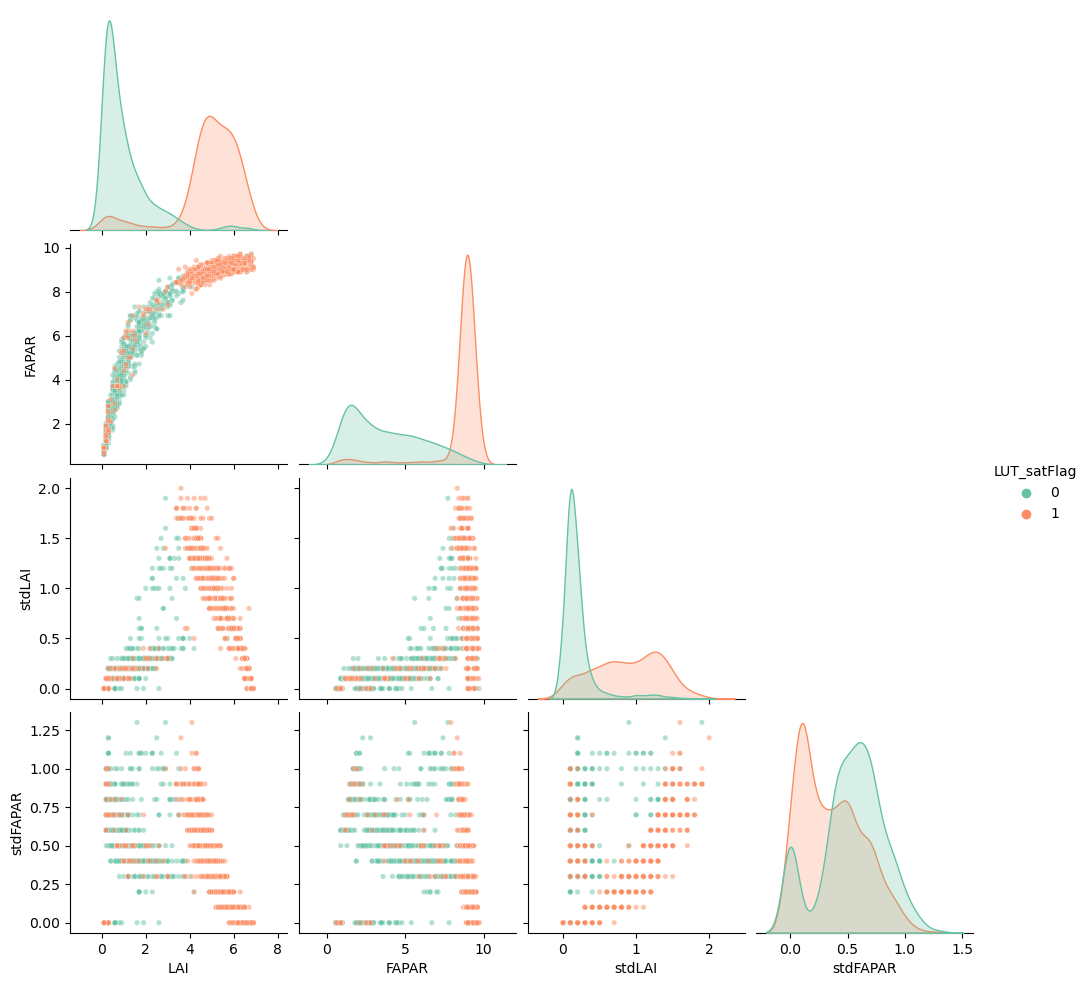

In [273]:
dfScaling = pd.DataFrame([[10., 10.,10.,10.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag'])
dfPlot = dfALL.loc[dfALL['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag']].groupby('LUT_satFlag').sample(1000).div(dfScaling.iloc[0])
dfPlot['LUT_satFlag'] = dfPlot['LUT_satFlag'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LUT_satFlag',palette='Set2',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure3.png", bbox_inches='tight') 

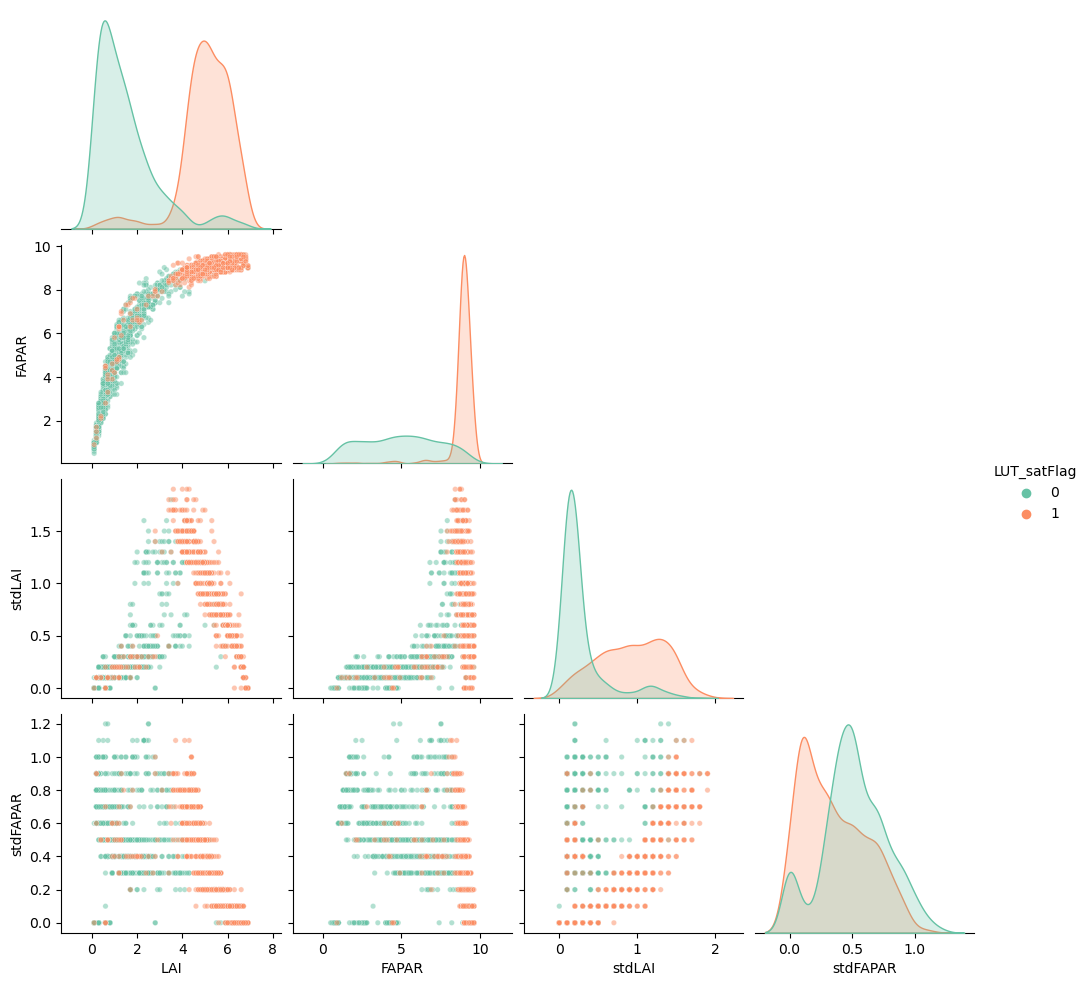

In [274]:
dfScaling = pd.DataFrame([[10., 10.,10.,10.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag'])
dfPlot = dfALLtrim.loc[dfALLtrim['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag']].groupby('LUT_satFlag').sample(1000).div(dfScaling.iloc[0])
dfPlot['LUT_satFlag'] = dfPlot['LUT_satFlag'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LUT_satFlag',palette='Set2',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure3.png", bbox_inches='tight') 

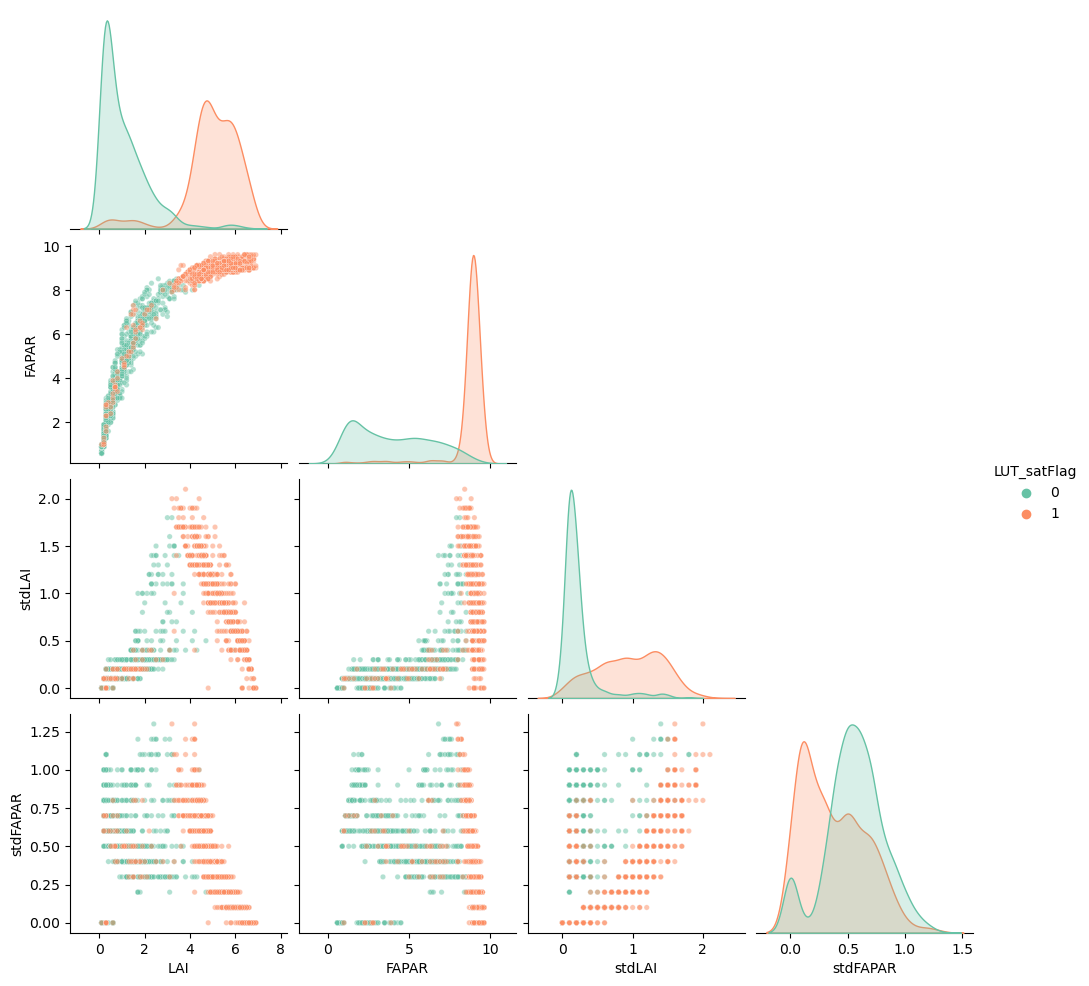

In [275]:
dfScaling = pd.DataFrame([[10., 10.,10.,10.,1]], columns=['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag'])
dfPlot = dfALLtrimKANG.loc[dfALLtrimKANG['LC_type3']<9][['LAI','FAPAR','stdLAI','stdFAPAR','LUT_satFlag']].groupby('LUT_satFlag').sample(1000).div(dfScaling.iloc[0])
dfPlot['LUT_satFlag'] = dfPlot['LUT_satFlag'].astype(int)
pairplot = sns.pairplot(dfPlot,hue='LUT_satFlag',palette='Set2',plot_kws={"s": 15,'alpha':0.5},corner=True)
#pairplot.fig.savefig("Figure3.png", bbox_inches='tight') 

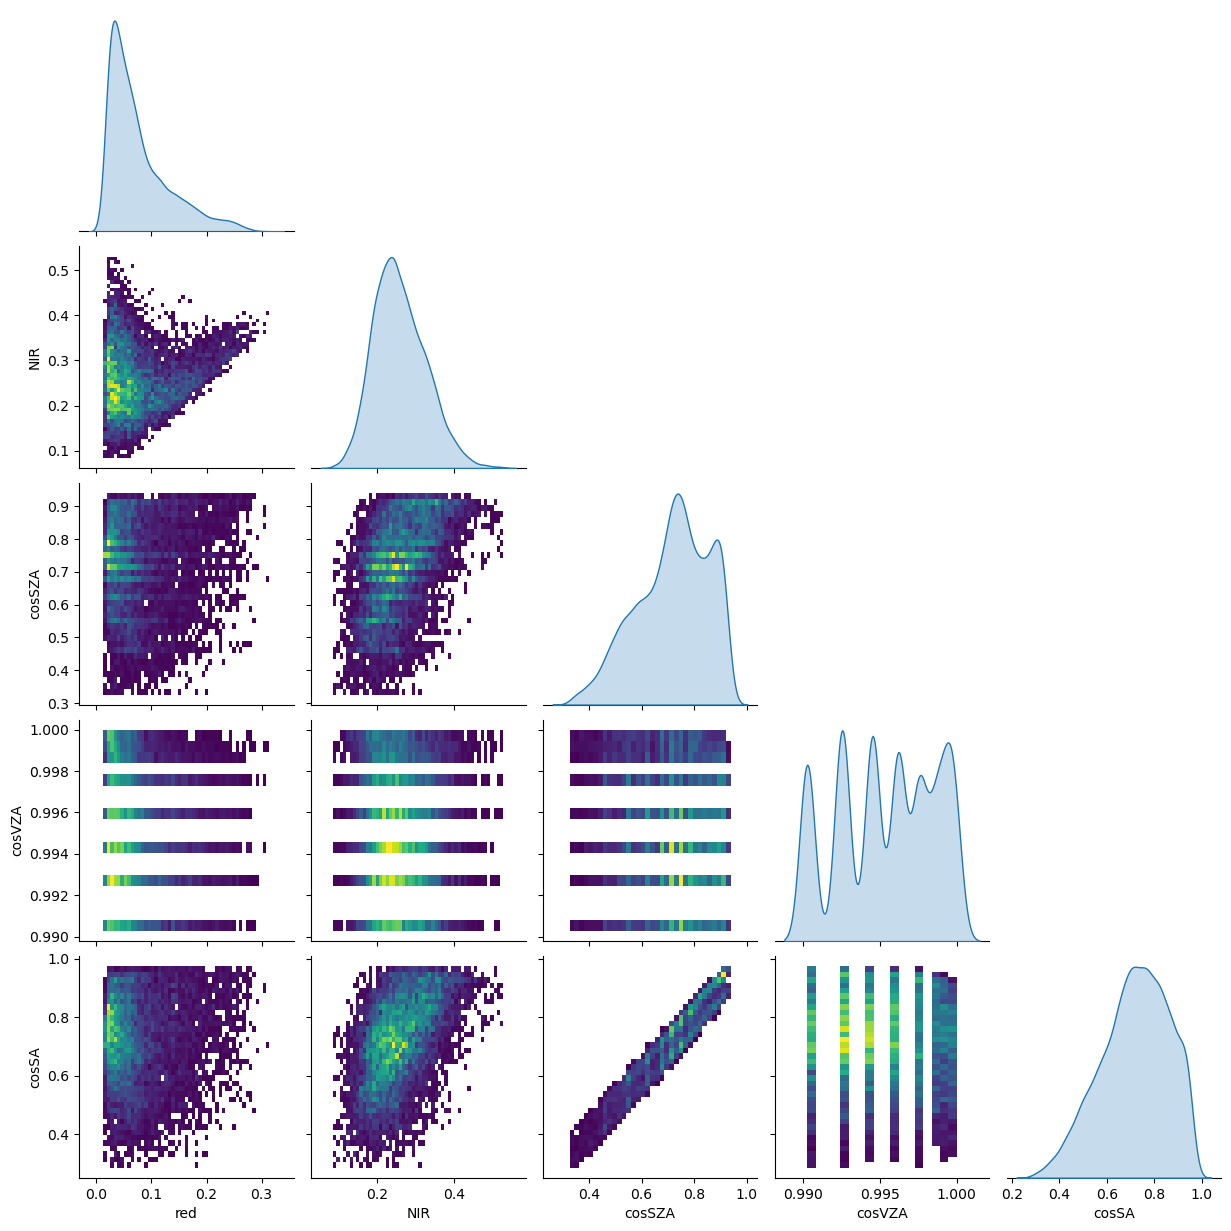

In [276]:
pairplot = sns.pairplot(dfALLtrim.loc[dfALLtrim['LC_type3']<9][['red','NIR','cosSZA','cosVZA','cosSA']].sample(10000).divide(10000),plot_kws={'cmap':'viridis'},kind='hist',diag_kind='kde',corner=True)
#pairplot.fig.savefig("Figure4.png", bbox_inches='tight') 

Graphs for dfALL

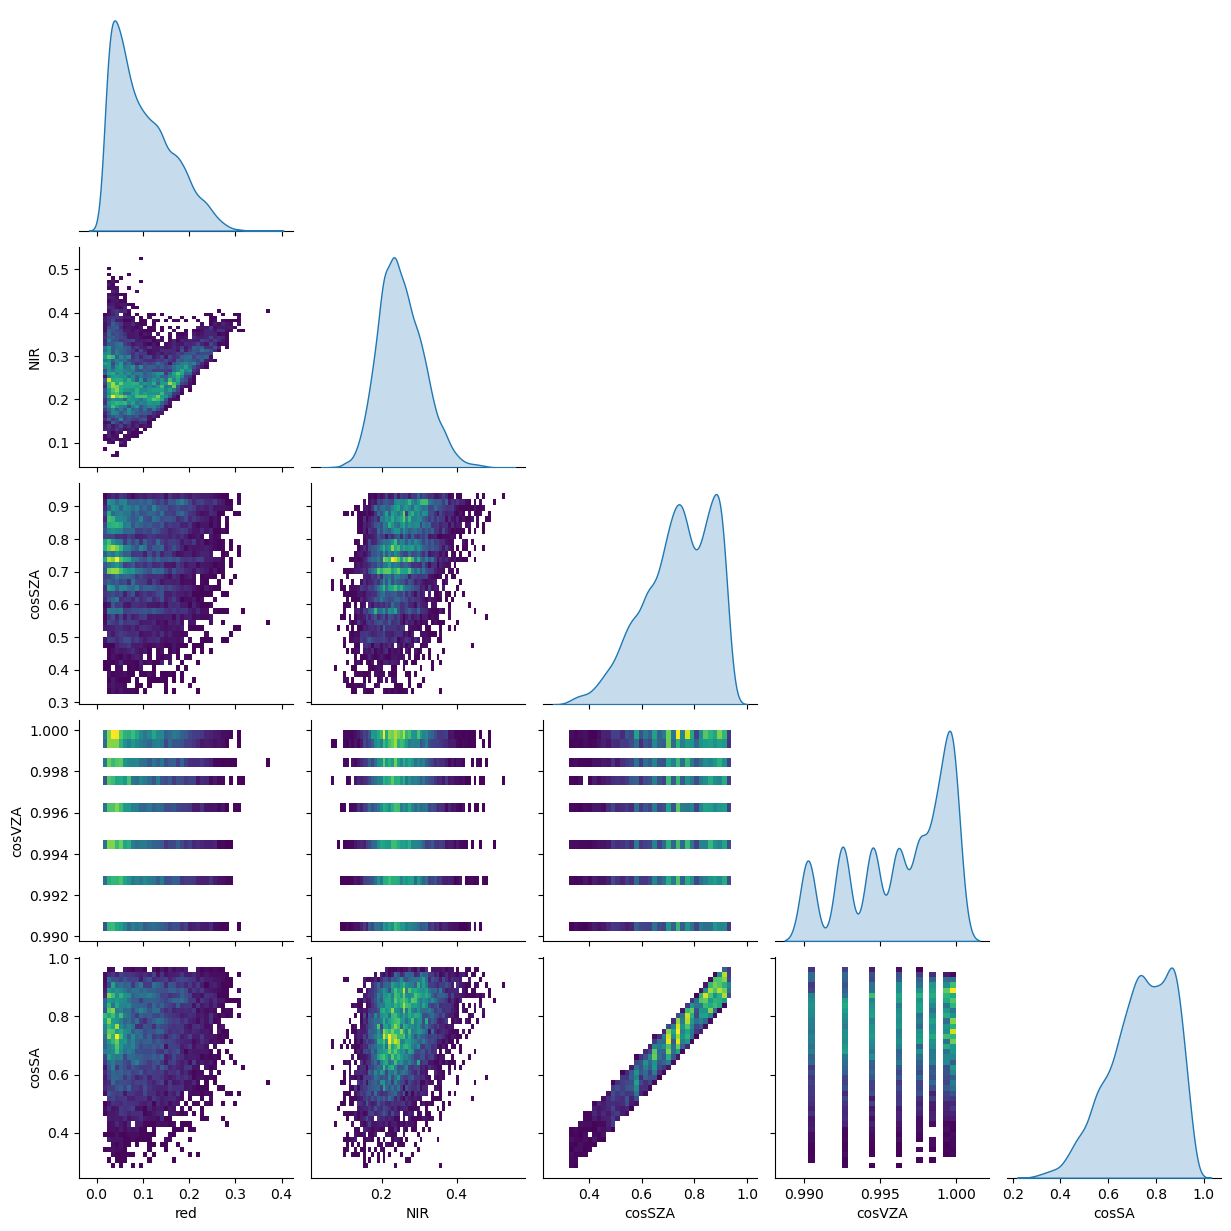

In [277]:
pairplot = sns.pairplot(dfALLtrimKANG.loc[dfALLtrimKANG['LC_type3']<9][['red','NIR','cosSZA','cosVZA','cosSA']].sample(10000).divide(10000),plot_kws={'cmap':'viridis'},kind='hist',diag_kind='kde',corner=True)
#pairplot.fig.savefig("Figure4.png", bbox_inches='tight')

Reading in calibration and validation data.

In [278]:
# Validation data for LAI and FAPAR
valbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictLAI.pkl')
valbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/valbiomeDictFAPAR.pkl')

# Calibration data for LAI and FAPAR
calbiomeDictLAI = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAI.pkl')
calbiomeDictFAPAR = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPAR.pkl')

# Kang's calibration data for LAI and FAPAR
calbiomeDictLAIKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictLAIKANG.pkl')
calbiomeDictFAPARKANG = pd.read_pickle('G:/cassidy/MODISLANDSAT/calbiomeDictFAPARKANG.pkl')

# https://drive.google.com/drive/folders/1jVKwxWPlH7nYnpL1yJAUD2jFkXV3A1kf?usp=share_link

In [279]:
# Regressors used in fitting the Random Forests
regressors = ['Lat','Lon','red','green','NIR','SWIR1','NDVI','NDWI','cosSZA','cosSA']

# Responses in the Random Forests
LAI = 'LAI'
FAPAR = 'FAPAR'

Fitting a Random Forests for LAI using the NAIVE method

In [280]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsLAI = []
dfsLAI10 = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictLAI:
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictLAI[LC_Type3]['DF'].sample(10000)
        dfval = valbiomeDictLAI[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictLAI[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictLAI[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[LAI])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictLAI[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictLAI[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[LAI])
        
        trueLAI = dfval[LAI]
        
        # Predicting LAI with the Random Forest using the validation data
        predLAI50 = calbiomeDictLAI[LC_Type3]['regr50'].predict(dfval[regressors])
        predLAI10 = calbiomeDictLAI[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictLAI[LC_Type3]['dfNAIVE50LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAI[LC_Type3]['regr50'].score(dfval[regressors], trueLAI),
            #square root this
            'RMSE': metrics.mean_squared_error(predLAI50, trueLAI, squared=False)})
        
        valbiomeDictLAI[LC_Type3]['dfNAIVE10LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAI[LC_Type3]['regr10'].score(dfval[regressors], trueLAI),
            #square root this
            'RMSE': metrics.mean_squared_error(predLAI10, trueLAI, squared=False)})
        
        # Merge two methods before sampling
        df = valbiomeDictLAI[LC_Type3]['dfNAIVE50LAI'].join(valbiomeDictLAI[LC_Type3]['dfNAIVE10LAI'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsLAI.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeLAI = pd.concat(dfsLAI)

R^2 and RMSE values for LAI Random Forest with min 50 leaf samples

In [281]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfNAIVE50LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8388346370815719 7.635069592381396
4 0.6355718149513891 11.680665959891911
7 0.6948789442742107 10.066827797038489
2 0.8127950513487987 5.341762376189289
1 0.6067336964859902 11.401987282539569
8 0.7818660506021857 8.876916694321885
3 0.6431317827942786 11.514253985208946
5 0.5884439816778746 11.328454289233976


R^2 and RMSE values for LAI Random Forest with min 10 leaf samples

In [282]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfNAIVE10LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8487810132348519 7.395717378329961
4 0.6607285107316039 11.270295621560576
7 0.7156252060554735 9.71856402523874
2 0.863060091231229 4.568681886580765
1 0.6638709338212088 10.541204013505016
8 0.8085338210413612 8.316614060226483
3 0.6786533232046434 10.926190692769408
5 0.6557954442493199 10.360112829604224


Scatterplotting True LAI vs Predicted LAI

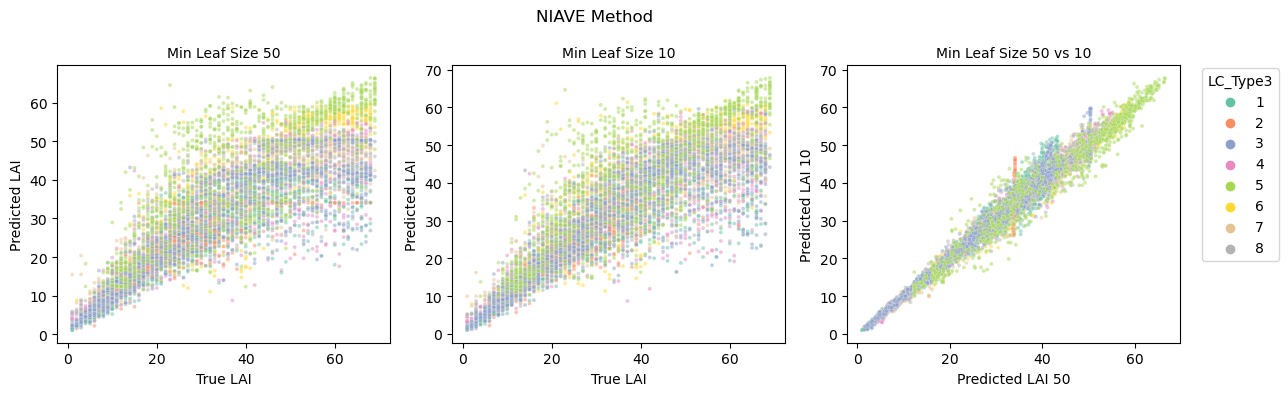

In [283]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeLAI, x='LAI_50', y='Predicted LAI_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeLAI, x='LAI_10', y='Predicted LAI_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeLAI, x='Predicted LAI_50', y='Predicted LAI_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('NIAVE Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True LAI', ylabel='Predicted LAI')

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True LAI', ylabel='Predicted LAI')

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted LAI 50', ylabel='Predicted LAI 10')
fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

Fitting a Random Forests for FAPAR using the NAIVE method

In [284]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsFAPAR = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictFAPAR:
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictFAPAR[LC_Type3]['DF'].sample(10000)
        dfval = calbiomeDictFAPAR[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictFAPAR[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictFAPAR[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[FAPAR])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictFAPAR[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictFAPAR[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[FAPAR])
        
        trueFAPAR = dfval[FAPAR]
        
        # Predicting FAPAR with the Random Forest using the validation data
        predFAPAR50 = calbiomeDictFAPAR[LC_Type3]['regr50'].predict(dfval[regressors])
        predFAPAR10 = calbiomeDictFAPAR[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictFAPAR[LC_Type3]['dfNAIVE50FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPAR[LC_Type3]['regr50'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR50, trueFAPAR, squared=False)})
        
        valbiomeDictFAPAR[LC_Type3]['dfNAIVE10FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPAR[LC_Type3]['regr10'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR10, trueFAPAR, squared=False)})
        
        # Merge two methods before sampling
        df = valbiomeDictFAPAR[LC_Type3]['dfNAIVE50FAPAR'].join(valbiomeDictFAPAR[LC_Type3]['dfNAIVE10FAPAR'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsFAPAR.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeFAPAR = pd.concat(dfsFAPAR)

R^2 and RMSE values for FAPAR Random Forest with min 50 leaf samples

In [285]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfNAIVE50FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.9163364178954245 5.47628544519744
4 0.8163396538500707 7.556813768474188
7 0.6793241051041521 7.370451717928064
2 0.9740126072356832 3.7301287406269483
1 0.9407582256687171 5.281802597638986
8 0.8576670779723823 6.3393665618721595
3 0.913038044696939 6.360829040485955
5 0.7211482163606973 5.00606107551559


R^2 and RMSE values for FAPAR Random Forest with min 10 leaf samples

In [286]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfNAIVE10FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.9250942941703796 5.181736205206037
4 0.8383301887050213 7.089987768687948
7 0.70892093251956 7.022090710826093
2 0.9770864340000931 3.50258600082567
1 0.9445259800218546 5.111083268067233
8 0.8850378992048694 5.6973188816607365
3 0.9224560309401115 6.006522225454934
5 0.7695208984107014 4.551192516537481


Scatterplotting True FAPAR vs Predicted FAPAR with the NAIVE Method

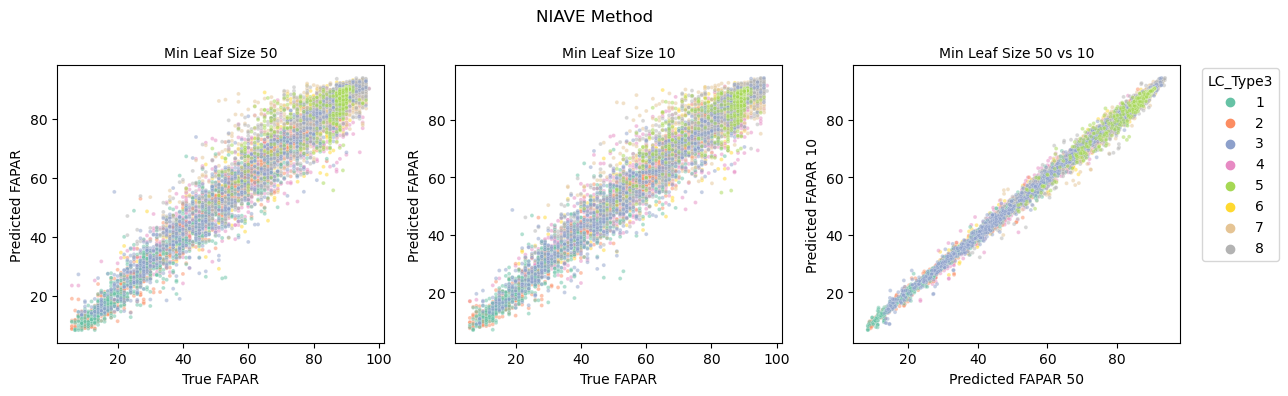

In [287]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeFAPAR, x='FAPAR_50', y='Predicted FAPAR_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeFAPAR, x='FAPAR_10', y='Predicted FAPAR_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeFAPAR, x='Predicted FAPAR_50', y='Predicted FAPAR_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('NIAVE Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted FAPAR 50', ylabel='Predicted FAPAR 10')
fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

Fitting a Random Forests for LAI using the KANG method

In [288]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsLAI = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictLAIKANG:
    
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictLAIKANG[LC_Type3]['DF'].sample(10000)
        dfval = calbiomeDictLAIKANG[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictLAIKANG[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictLAIKANG[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[LAI])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictLAIKANG[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictLAIKANG[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[LAI])
        
        trueLAI = dfval[LAI]
        
        # Predicting LAI with the Random Forest using the validation data
        predLAI50 = calbiomeDictLAIKANG[LC_Type3]['regr50'].predict(dfval[regressors])
        predLAI10 = calbiomeDictLAIKANG[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictLAI[LC_Type3]['dfKANG50LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAIKANG[LC_Type3]['regr50'].score(dfval[regressors], trueLAI),
            'RMSE': metrics.mean_squared_error(predLAI50, trueLAI, squared=False)})
        
        valbiomeDictLAI[LC_Type3]['dfKANG10LAI'] = pd.DataFrame(data={
            'LAI': trueLAI,
            'Predicted LAI': predLAI10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictLAIKANG[LC_Type3]['regr10'].score(dfval[regressors], trueLAI),
            'RMSE': metrics.mean_squared_error(predLAI10, trueLAI, squared=False)})
        
        # Merge two methods before sampling
        df = valbiomeDictLAI[LC_Type3]['dfKANG50LAI'].join(valbiomeDictLAI[LC_Type3]['dfKANG10LAI'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsLAI.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeLAIKANG = pd.concat(dfsLAI)

R^2 and RMSE values for LAI Random Forest with min 50 leaf samples

In [289]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfKANG50LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8853447119258218 6.471876263493137
4 0.7531528137329742 6.446876330070963
7 0.6981366480413636 7.899658982013166
2 0.9348200816544477 1.8066521467047612
1 0.8459151153850044 3.635244484438805
8 0.8321666250454576 6.644893749842011
3 0.8141346270604118 4.73234055432593
5 0.7279406123560865 7.803667880216614


R^2 and RMSE values for LAI Random Forest with min 10 leaf samples

In [290]:
for LC_Type3 in valbiomeDictLAI:
    if LC_Type3 <= 8:
        df = valbiomeDictLAI[LC_Type3]['dfKANG10LAI'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.8965746115440815 6.1467668554718875
4 0.7688904296469437 6.237983386100396
7 0.7212515065636529 7.591182161039109
2 0.946544635200324 1.6361129579161158
1 0.8602853256340881 3.4615819440875253
8 0.8592309270102932 6.085587377709242
3 0.8331008553373346 4.48439440517882
5 0.7719666256517195 7.144406001001028


Scatterplotting True LAI vs Predicted LAI

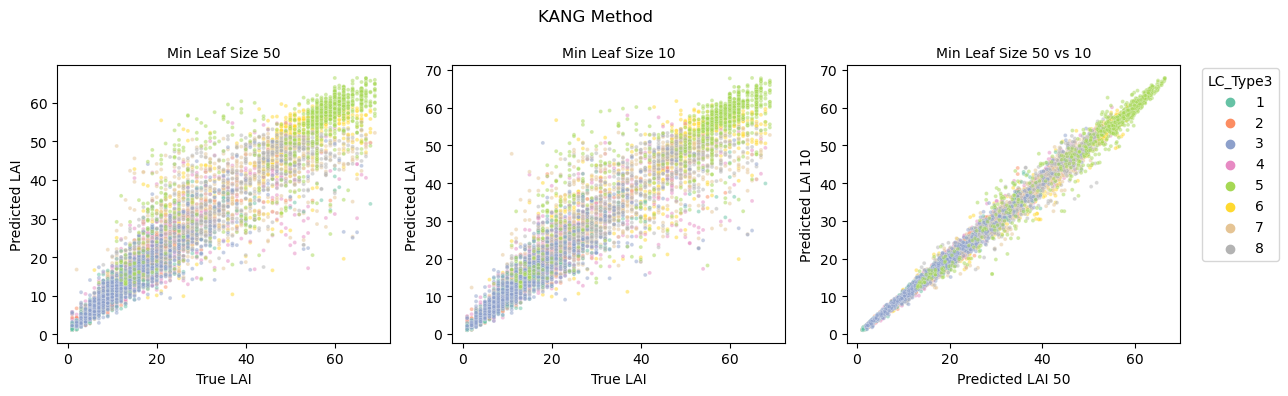

In [291]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeLAIKANG, x='LAI_50', y='Predicted LAI_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeLAIKANG, x='LAI_10', y='Predicted LAI_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeLAIKANG, x='Predicted LAI_50', y='Predicted LAI_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('KANG Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True LAI', ylabel='Predicted LAI')

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True LAI', ylabel='Predicted LAI')

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted LAI 50', ylabel='Predicted LAI 10')
fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()

Fitting a Random Forests for FAPAR using the KANG method

In [292]:
# Empty arrays used later to concatenate dataframes of all LC_Types
dfsFAPAR = []

# Looping through each LC_Type
for LC_Type3 in calbiomeDictFAPARKANG:
    
    # Only fit Random Forests for LC_Types 1-8
    if LC_Type3 <= 8:
        
        # Extracting the dataframe from the calibration and validation data for the LC_Type
        # Only 10000 samples are used from the calibration data
        dfcal = calbiomeDictFAPARKANG[LC_Type3]['DF'].sample(10000)
        dfval = calbiomeDictFAPARKANG[LC_Type3]['DF']
        
        # Fitting a Random Forest with min leaf size equal to 50
        calbiomeDictFAPARKANG[LC_Type3]['regr50'] = RandomForestRegressor(min_samples_leaf = 50)
        calbiomeDictFAPARKANG[LC_Type3]['regr50'].fit(dfcal[regressors], dfcal[FAPAR])
        
        # Fitting a Random Forest with min leaf size equal to 10
        calbiomeDictFAPARKANG[LC_Type3]['regr10'] = RandomForestRegressor(min_samples_leaf = 10)
        calbiomeDictFAPARKANG[LC_Type3]['regr10'].fit(dfcal[regressors], dfcal[FAPAR])
        
        trueFAPAR = dfval[FAPAR]
        
        # Predicting FAPAR with the Random Forest using the validation data 
        predFAPAR50 = calbiomeDictFAPARKANG[LC_Type3]['regr50'].predict(dfval[regressors])
        predFAPAR10 = calbiomeDictFAPARKANG[LC_Type3]['regr10'].predict(dfval[regressors])
        
        # Inserting the new statistics as a dataframe into the dictionary
        valbiomeDictFAPAR[LC_Type3]['dfKANG50FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR50,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPARKANG[LC_Type3]['regr50'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR50, trueFAPAR, squared=False)})
        
        valbiomeDictFAPAR[LC_Type3]['dfKANG10FAPAR'] = pd.DataFrame(data={
            'FAPAR': trueFAPAR,
            'Predicted FAPAR': predFAPAR10,
            'LC_Type3': LC_Type3,
            'R2': calbiomeDictFAPARKANG[LC_Type3]['regr10'].score(dfval[regressors], trueFAPAR),
            'RMSE': metrics.mean_squared_error(predFAPAR10, trueFAPAR, squared=False)})
        
        # Merge two methods before sampling
        df = valbiomeDictFAPAR[LC_Type3]['dfKANG50FAPAR'].join(valbiomeDictFAPAR[LC_Type3]['dfKANG10FAPAR'], lsuffix='_50', rsuffix='_10')
        
        # Appending the dataframes to an array used to concatenate later
        dfsFAPAR.append(df.sample(1000))
        
# Concatenating the dataframes with the predicted LAI values for all LC_Types
dfcalbiomeFAPARKANG = pd.concat(dfsFAPAR)

R^2 and RMSE values for FAPAR Random Forest with min 50 leaf samples

In [293]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfKANG50FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.91472836341264 5.533041036625328
4 0.8120138963677864 7.649759223302138
7 0.6722474005856001 7.445971032638792
2 0.9730895885836157 3.795757869207038
1 0.9350673252374386 5.541587643475417
8 0.8591525105318659 6.327562783500884
3 0.9037809733251614 6.6630697663019465
5 0.7164953299495374 5.030988383850813


R^2 and RMSE values for FAPAR Random Forest with min 10 leaf samples

In [294]:
for LC_Type3 in valbiomeDictFAPAR:
    if LC_Type3 <= 8:
        df = valbiomeDictFAPAR[LC_Type3]['dfKANG10FAPAR'][['R2', 'RMSE']]
        print(LC_Type3, df['R2'].unique()[0], df['RMSE'].unique()[0])

6 0.9227330301986949 5.266941958155949
4 0.832414788835494 7.222752581903682
7 0.7044283420916195 7.070980893796405
2 0.9762365930357461 3.5669143838716253
1 0.9391549689122239 5.36432545059571
8 0.8831537253398065 5.763275004225988
3 0.9128789421289925 6.34023639828926
5 0.7711228089670293 4.520374989389413


Scatterplotting True FAPAR vs Predicted FAPAR

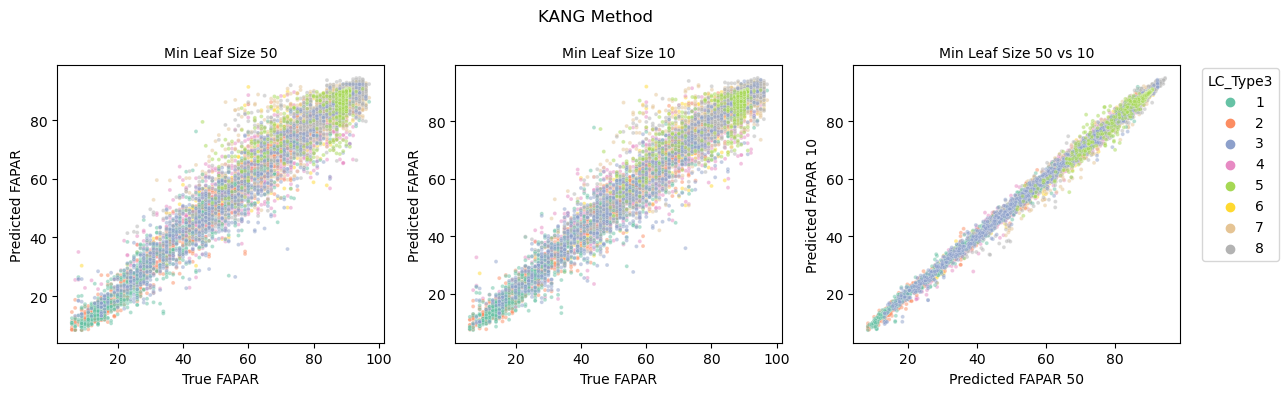

In [295]:
fig, axs = plt.subplots(1,3, figsize=(12, 4))
sns.scatterplot(dfcalbiomeFAPARKANG, x='FAPAR_50', y='Predicted FAPAR_50', ax=axs[0], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)
sns.scatterplot(dfcalbiomeFAPARKANG, x='FAPAR_10', y='Predicted FAPAR_10', ax=axs[1], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5)
sns.scatterplot(dfcalbiomeFAPARKANG, x='Predicted FAPAR_50', y='Predicted FAPAR_10', ax=axs[2], hue='LC_Type3_50', palette='Set2', s=8, alpha=0.5, legend=0)

fig.suptitle('KANG Method')
axs[0].set_title('Min Leaf Size 50', size=10)
axs[0].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')

axs[1].set_title('Min Leaf Size 10', size=10)
axs[1].set(xlabel='True FAPAR', ylabel='Predicted FAPAR')

axs[2].set_title('Min Leaf Size 50 vs 10', size=10)
axs[2].set(xlabel='Predicted FAPAR 50', ylabel='Predicted FAPAR 10')
fig.tight_layout()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper left", bbox_to_anchor=(1,0.85), title = "LC_Type3")
axs[1].get_legend().set_visible(False)

plt.show()